In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import os
from astropy.cosmology import FlatLambdaCDM
import GCR
import GCRCatalogs as GCRCat
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import itertools
from itertools import permutations 
from itertools import product 
import bilby as bb


cosmo = FlatLambdaCDM(H0=70, Om0=0.283, Tcmb0=2.725)

plt.rcParams.update({

    # --- Figure Layout ---
    "figure.figsize": (6, 4),           # Default figure size in inches
    "figure.dpi": 150,                  # DPI for crisp rendering
    "savefig.dpi": 300,                 # Higher DPI for saved figures
    "figure.autolayout": True,          # Avoids label overlap

    # --- Font & Text ---
    "font.family": "monospace",             # Or "sans-serif" for modern look
    "font.serif": ["Terminal"],  # Matches many journals
    "font.size": 12,                    # Base font size
    "axes.titlesize": 14,               # Title font size
    "axes.labelsize": 13,               # Axis label size
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "mathtext.fontset": "dejavuserif",  # Matches the serif font

    # --- Line & Marker Styles ---
    "lines.linewidth": 1.8,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.7,

    # --- Axes ---
    "axes.linewidth": 1.0,              # Frame thickness
    "axes.labelpad": 6,                 # Padding between label and axis
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "grid.linewidth": 0.7,
    "axes.spines.top": False,           # Removes top spine
    "axes.spines.right": False,         # Removes right spine

    # --- Ticks ---
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.top": False,
    "ytick.right": False,

    # --- Legend ---
    "legend.frameon": False,
    "legend.handlelength": 2,
    "legend.handletextpad": 0.4,
    "legend.loc": "best",

    # --- Colors and Colormaps ---
    "image.cmap": "viridis",            # Good perceptually uniform default
    "axes.prop_cycle": plt.cycler("color", [
        "#1f77b4", "#ff7f0e", "#2ca02c",
        "#d62728", "#9467bd", "#8c564b",
        "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
    ]),
})

In [7]:
def LSST_mag_lim(C_m,m_sky,theta_eff,t_vis,k_m,X):
    '''
    C_m is the band dependent parameter
    m_sky is the sky brightness (AB mag arcsec−2)
    theta_eff is the seeing (in arcseconds)
    t_vis is the exposure time (seconds)
    k_m is the atmospheric extinction coefficient
    X is air mass
    '''
    return C_m + 0.5 * (m_sky-21) + 2.5*np.log10(0.7/theta_eff)+1.25*np.log10(t_vis/30)-k_m*(X-1)

def getLSSTBandParameters(band):
    # Band dict in the form of band: [C_m,m_sky,theta_eff,k_m]
    # From eq. 6 of Ivecic 2019
    bandDict = {"u":[23.09,22.99,0.92,0.491],
                "g":[24.42,22.26,0.87,0.213],
                "r":[24.44,21.20,0.83,0.126],
                "i":[24.32,20.48,0.80,0.096],
                "z":[24.16,19.60,0.78,0.069],
                "y":[23.73,18.61,0.76,0.170],
               }
    return bandDict[band.lower()]

In [8]:
visits_per_yr = np.array([56, 74, 184, 187, 166, 171])/10 # visits per year in u-g-r-i-z-y
expTimes = [38,30,30,30,30,30]
X = 1.3 # SDSS average, for reference
allBands = ["u","g","r","i","z","y"]

In [9]:
maglist = []
for y in np.arange(1,11):
    print(f"For year {y}")
    for b,v,expTime in zip(allBands,visits_per_yr,expTimes):
        C_m,m_sky,theta_eff,k_m = getLSSTBandParameters(b)
        mag = LSST_mag_lim(C_m,m_sky,theta_eff,y*expTime*v,k_m,X)
        print(f"{b}: {mag:.2f}")
        maglist.append(mag)
    print()
maglist = np.reshape(maglist,(10,6))

For year 1
u: 24.70
g: 25.84
r: 25.90
i: 25.48
z: 24.85
y: 23.94

For year 2
u: 25.08
g: 26.21
r: 26.27
i: 25.85
z: 25.22
y: 24.31

For year 3
u: 25.30
g: 26.43
r: 26.49
i: 26.07
z: 25.44
y: 24.53

For year 4
u: 25.46
g: 26.59
r: 26.65
i: 26.23
z: 25.60
y: 24.69

For year 5
u: 25.58
g: 26.71
r: 26.77
i: 26.35
z: 25.72
y: 24.81

For year 6
u: 25.68
g: 26.81
r: 26.87
i: 26.45
z: 25.82
y: 24.91

For year 7
u: 25.76
g: 26.89
r: 26.95
i: 26.53
z: 25.90
y: 24.99

For year 8
u: 25.83
g: 26.97
r: 27.03
i: 26.60
z: 25.98
y: 25.06

For year 9
u: 25.90
g: 27.03
r: 27.09
i: 26.67
z: 26.04
y: 25.13

For year 10
u: 25.95
g: 27.09
r: 27.15
i: 26.73
z: 26.10
y: 25.19



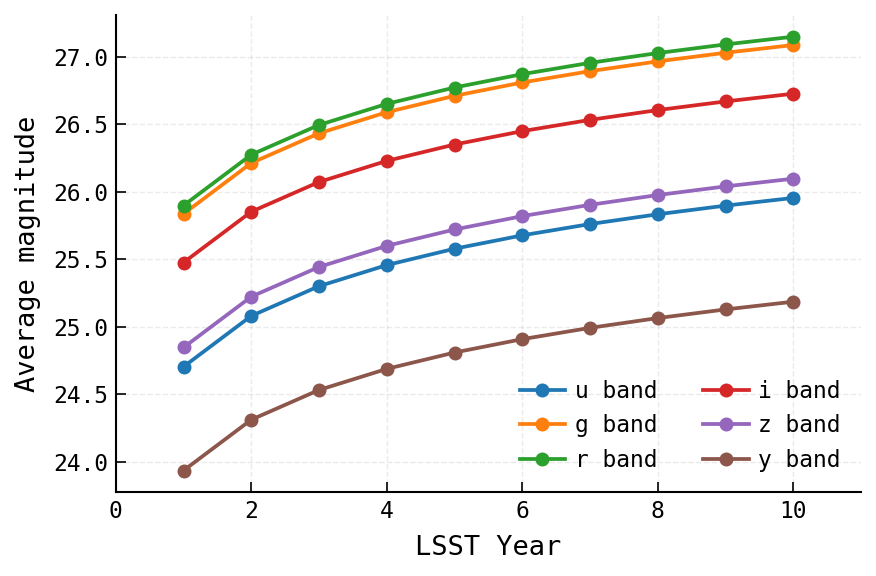

In [10]:
for b,mags in zip(allBands,maglist.T):
    plt.plot(np.arange(1,11),mags,"-o",label=f"{b} band")
plt.xlabel("LSST Year")
plt.ylabel("Average magnitude")
plt.xlim(0,11)
plt.legend(ncols=2)
plt.tight_layout()
plt.show()

## Host Probability

Here, we want to take a redshift limit, in the z-L plane, and draw randomly from all galaxies that are brighter AND within the aforementioned redshift range

# SkySim5000

In [6]:
for ent in GCRCat.get_available_catalog_names():
    if ent.startswith("skysim"):
        print(ent)

skysim5000_v1.1.1
skysim5000_v1.1.1_redmagic_v0.8.5_highdens
skysim5000_v1.1.1_redmagic_v0.8.5_highlum
skysim5000_v1.1.1_redmapper_v0.8.5
skysim5000_v1.1.2
skysim5000_v1.2


In [11]:
import pandas as pd

cat_name2 = "skysim5000_v1.2_small"
skysimCat = GCRCat.load_catalog(cat_name2)
# catz.shape

In [12]:
cosmo = skysimCat.cosmology

## Validate a schecter function across wide z for different LSST filters
- u-g-r-i-z-Y
- from z=0 to z=3, in bins of z=0.5 width
- semilogy plot, x axis showing absolute mag in a certain band, y axis showing log luminosity function (i.e., number of galaxies in that luminosity bin, renormalized to 1/Mpc^3)
- abs mag range - -22.5 to -15.5. step in steps of 0.2

In [13]:
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                   "LSST_filters/magnitude:LSST_u:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_r:rest",
                                   "LSST_filters/magnitude:LSST_i:rest",
                                   "LSST_filters/magnitude:LSST_z:rest",
                                    "LSST_filters/magnitude:LSST_y:rest"])


KeyboardInterrupt



KeyboardInterrupt: 

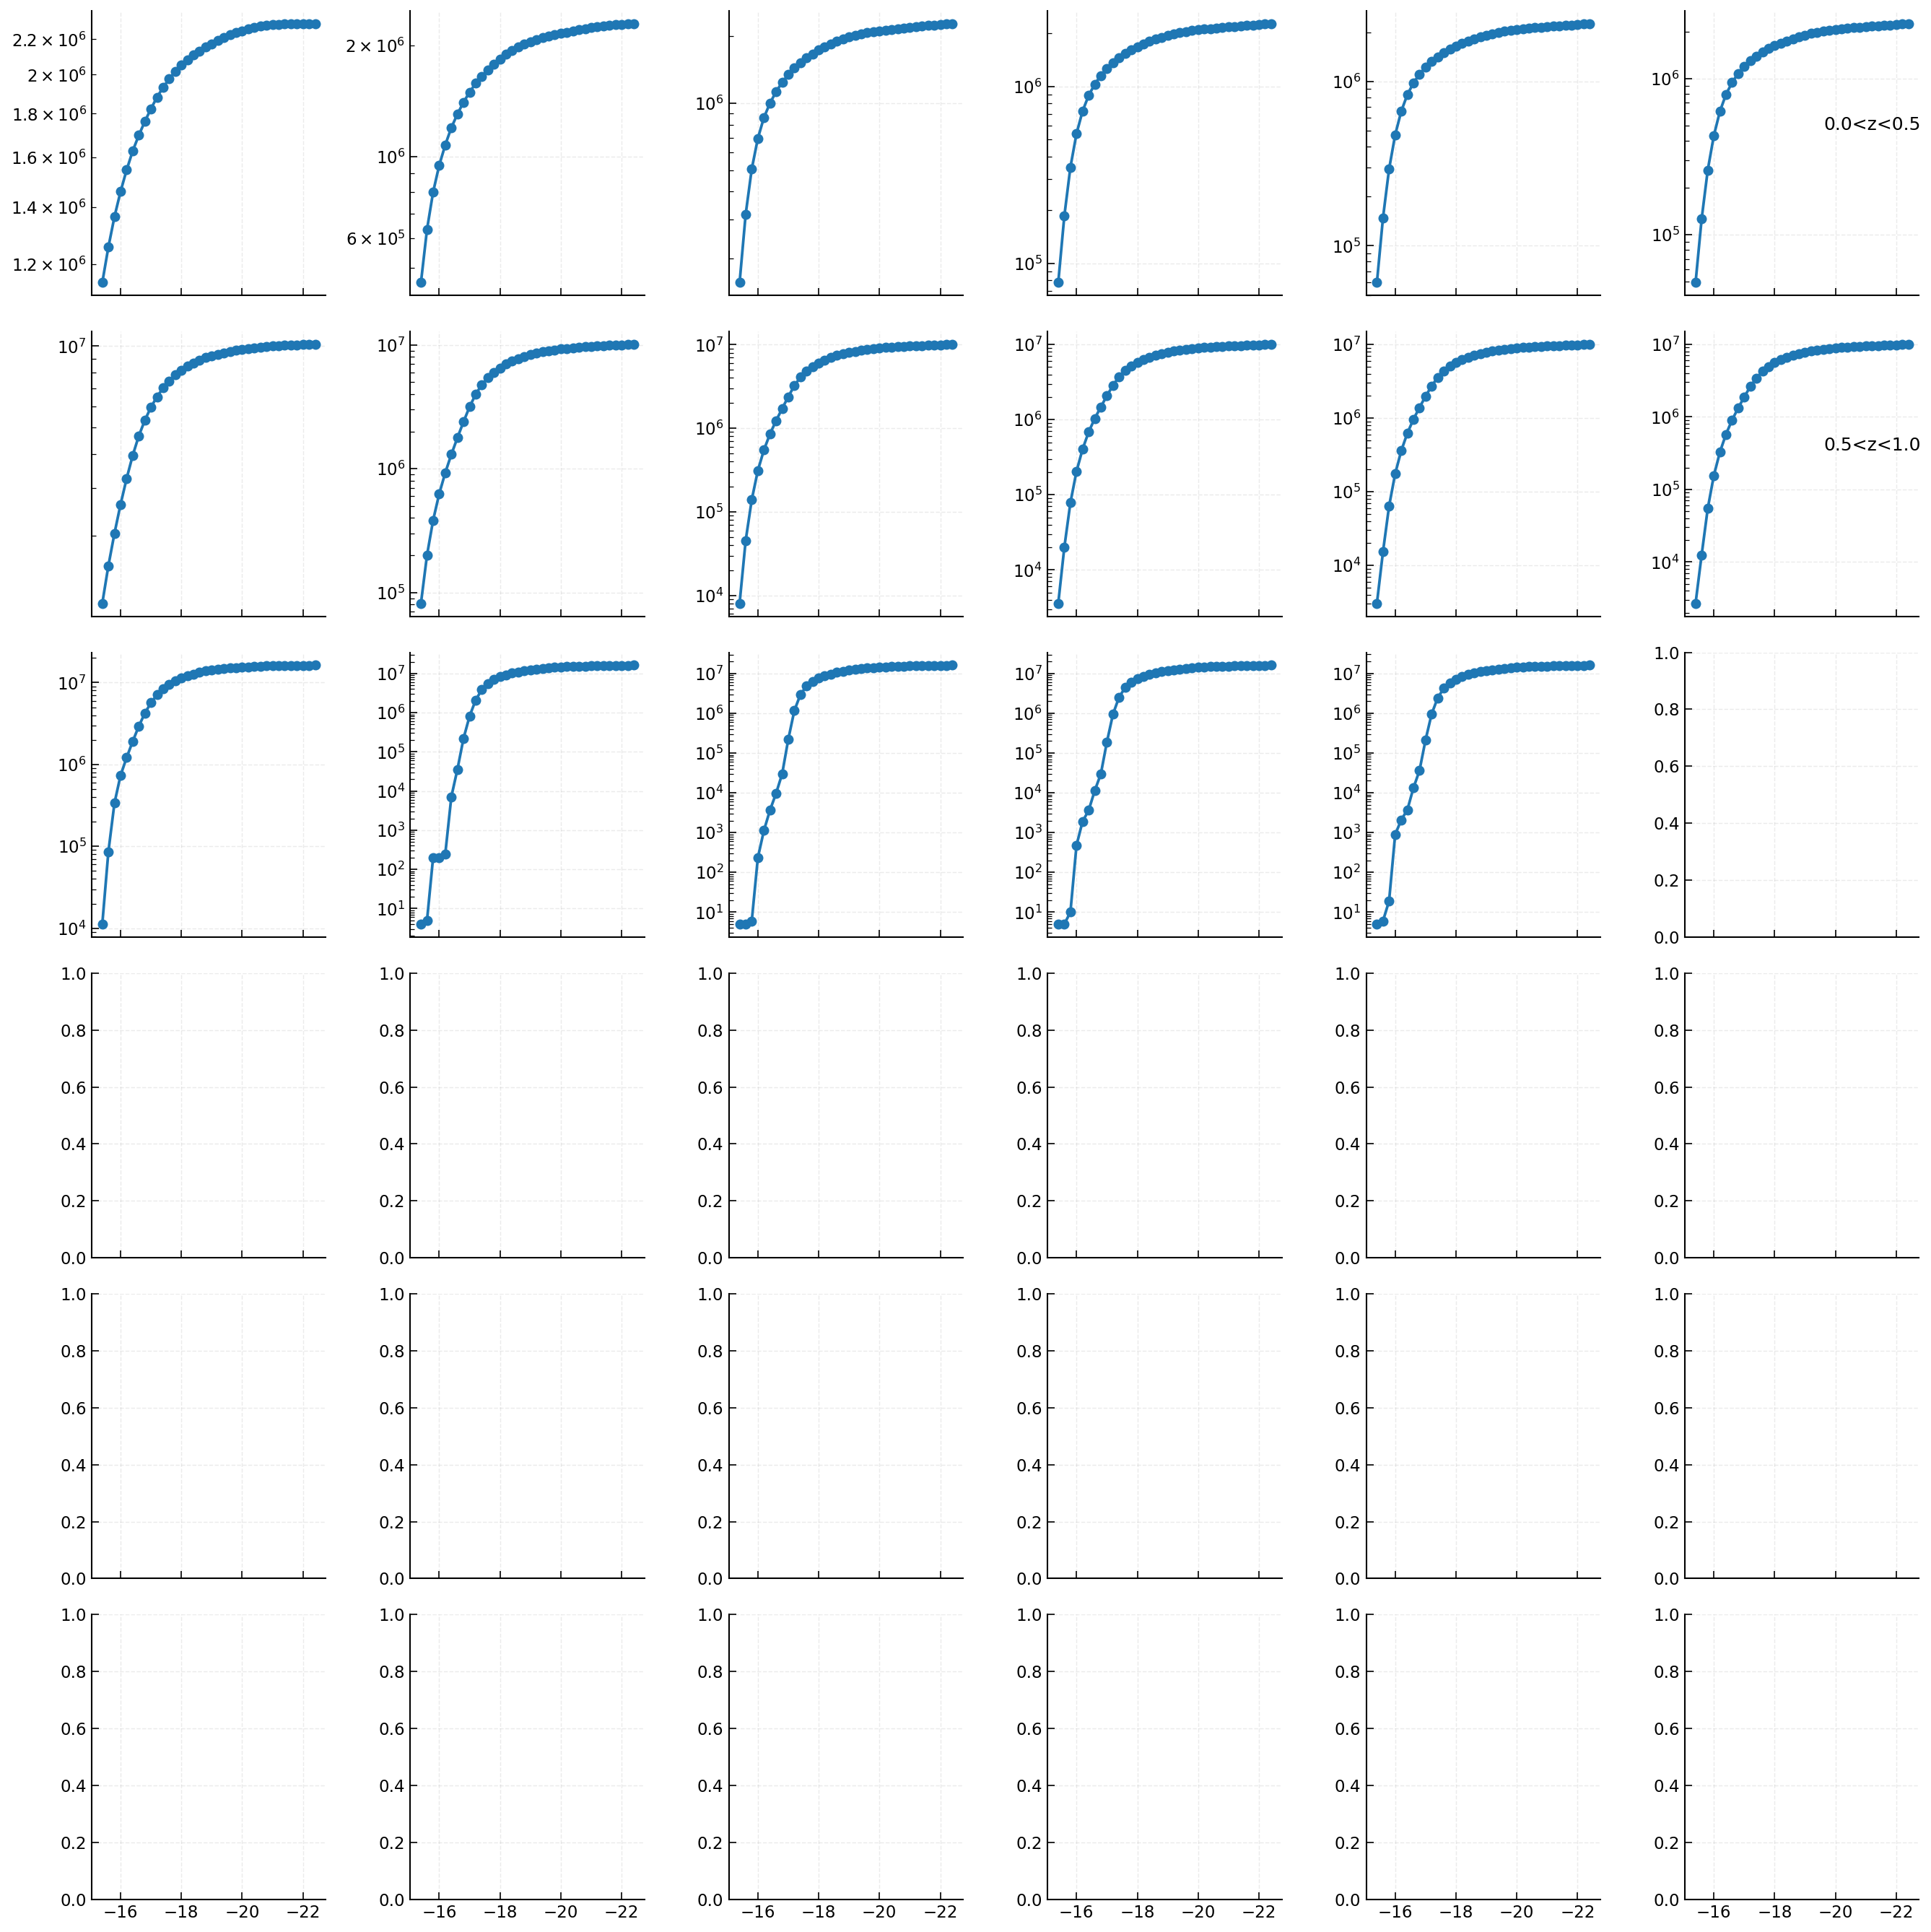

In [9]:
z_step = 0.5
delta_mag = 0.2
fig,axs = plt.subplots(6,6,figsize=(18,18),sharex=True)

rowIter=0

# allDataDict= {}

for z_lower in np.arange(0,3,step=z_step):
    # %%time
    data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest),filters=(f"redshift>{z_lower}",f"redshift<{z_lower+z_step}","is_central==True")))
    colIter=0
    for columnName in ["LSST_filters/magnitude:LSST_u:rest",
                           "LSST_filters/magnitude:LSST_g:rest",
                           "LSST_filters/magnitude:LSST_r:rest",
                           "LSST_filters/magnitude:LSST_i:rest",
                           "LSST_filters/magnitude:LSST_z:rest",
                           "LSST_filters/magnitude:LSST_y:rest"]:

        band = columnName.split(":")[-2][-1]
        
        ax = axs[rowIter,colIter]
        
        bin_num = {}
        for mag_low in np.arange(-22.5,-15.4,step=delta_mag):
            bin_num[mag_low+delta_mag/2] = len(data[np.logical_and(data[columnName]>mag_low, data[columnName]>mag_low+delta_mag)])

        # allDataDict[z_lower] = dict(band,bin_num)
        
        k,v = bin_num.keys(),bin_num.values()
        
        ax.plot(k,v,"-o")
        ax.semilogy()
        ax.xaxis.set_inverted(True)

        colIter+=1
    rowIter+=1

    ax.text(0.8, 0.6, f'{z_lower}<z<{z_lower+z_step}',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

for a,band in zip(axs[-1,:],["u","g","r","i","z","Y"]):
    a.set_xlabel("$M_{}$".format(band))

for a in axs[:,0]:
    a.set_ylabel("$N_{gals}$")

for a in axs.flatten():
    a.grid(ls='--',which='major')
    a.grid(ls='-.',which='minor',alpha=0.3)

fig.tight_layout()
fig.savefig(os.path.join(os.getcwd(),"SkySimSchecter.jpg"),dpi=200)
plt.show()

In [14]:
%%time
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                   "LSST_filters/magnitude:LSST_u:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_r:rest",
                                   "LSST_filters/magnitude:LSST_i:rest",
                                   "LSST_filters/magnitude:LSST_z:rest",
                                    "LSST_filters/magnitude:LSST_y:rest",
                                  "stellar_mass","halo_mass","is_central"])
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest)))

CPU times: user 3.44 s, sys: 16.9 s, total: 20.4 s
Wall time: 25 s


In [16]:
data

,halo_mass,LSST_filters/magnitude:LSST_r:rest,stellar_mass,LSST_filters/magnitude:LSST_i:rest,redshiftHubble,galaxyID,is_central,LSST_filters/magnitude:LSST_z:rest,LSST_filters/magnitude:LSST_u:rest,LSST_filters/magnitude:LSST_g:rest,LSST_filters/magnitude:LSST_y:rest,redshift
0,2.472611e+11,-19.490667,3.843968e+09,-19.641598,0.021528,10070000000000,True,-19.720839,-18.130419,-19.170687,-19.774324,0.022012
1,5.465768e+10,-16.130363,4.857164e+07,-16.299818,0.020944,10070000000001,True,-16.384882,-14.983802,-15.799252,-16.442663,0.020724
2,3.487682e+11,-19.664007,4.128166e+09,-19.851128,0.020528,10070000000002,True,-19.957903,-18.356327,-19.306858,-20.023260,0.020922
3,7.027417e+10,-16.518398,5.973682e+07,-16.736721,0.017873,10070000000003,True,-16.854864,-15.005349,-16.075336,-16.926462,0.018407
4,8.068516e+10,-17.320200,1.942851e+08,-17.488804,0.001106,10070000000004,True,-17.590200,-16.253250,-17.022739,-17.655111,0.000889
...,...,...,...,...,...,...,...,...,...,...,...,...
93947746,4.476727e+10,-18.602928,9.498182e+07,-18.674686,3.026532,9943200191150,True,-18.710220,-17.562988,-18.458942,-18.748577,3.028287
93947747,5.842828e+10,-19.150379,1.423304e+08,-19.191593,3.012949,9943200191151,True,-19.215153,-18.306728,-19.071177,-19.249542,3.012375
93947748,1.106196e+10,-18.704712,7.870476e+06,-18.753759,3.013216,9943200191152,True,-18.781633,-17.951912,-18.618912,-18.812241,3.012953
93947749,1.303879e+10,-17.130688,7.911783e+06,-17.144182,2.967263,9943200191153,True,-17.140089,-16.476864,-17.100580,-17.154819,2.965215


<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2101321/107138587.py:8: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel("$log(M_{\odot})$")


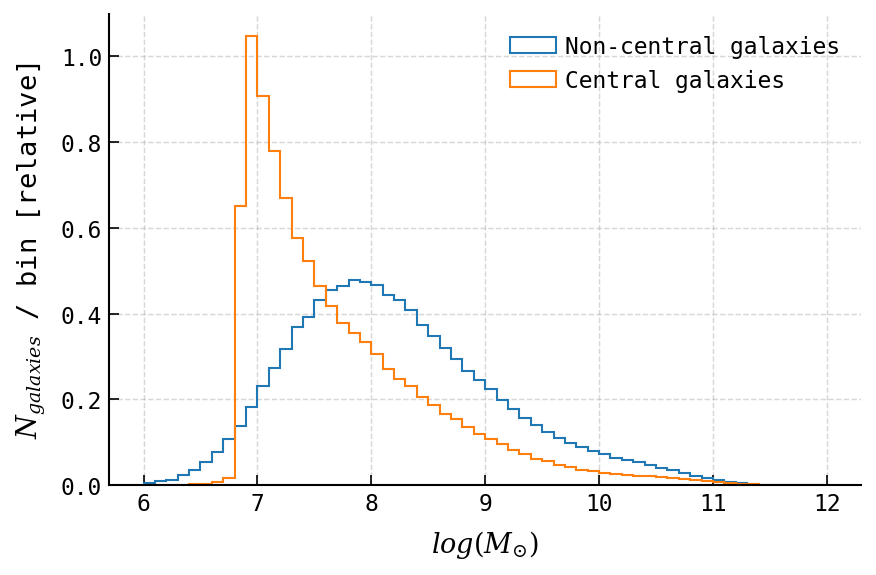

In [15]:
msk = data["is_central"]==False

fig,ax = plt.subplots()

ax.hist(np.log10(data["stellar_mass"][msk]),bins=np.arange(6,12.1,step=0.1),histtype='step',label="Non-central galaxies",density=True)
ax.hist(np.log10(data["stellar_mass"][~msk]),bins=np.arange(6,12.1,step=0.1),histtype='step',label="Central galaxies",density=True)

ax.set_xlabel("$log(M_{\odot})$")
ax.set_ylabel("$N_{galaxies}$ / bin [relative]")
ax.grid(alpha=0.5)
ax.legend()

<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2101321/1072552874.py:14: SyntaxWarning: invalid escape sequence '\o'
  axs[0].set_ylabel("$log(M_\odot)$")


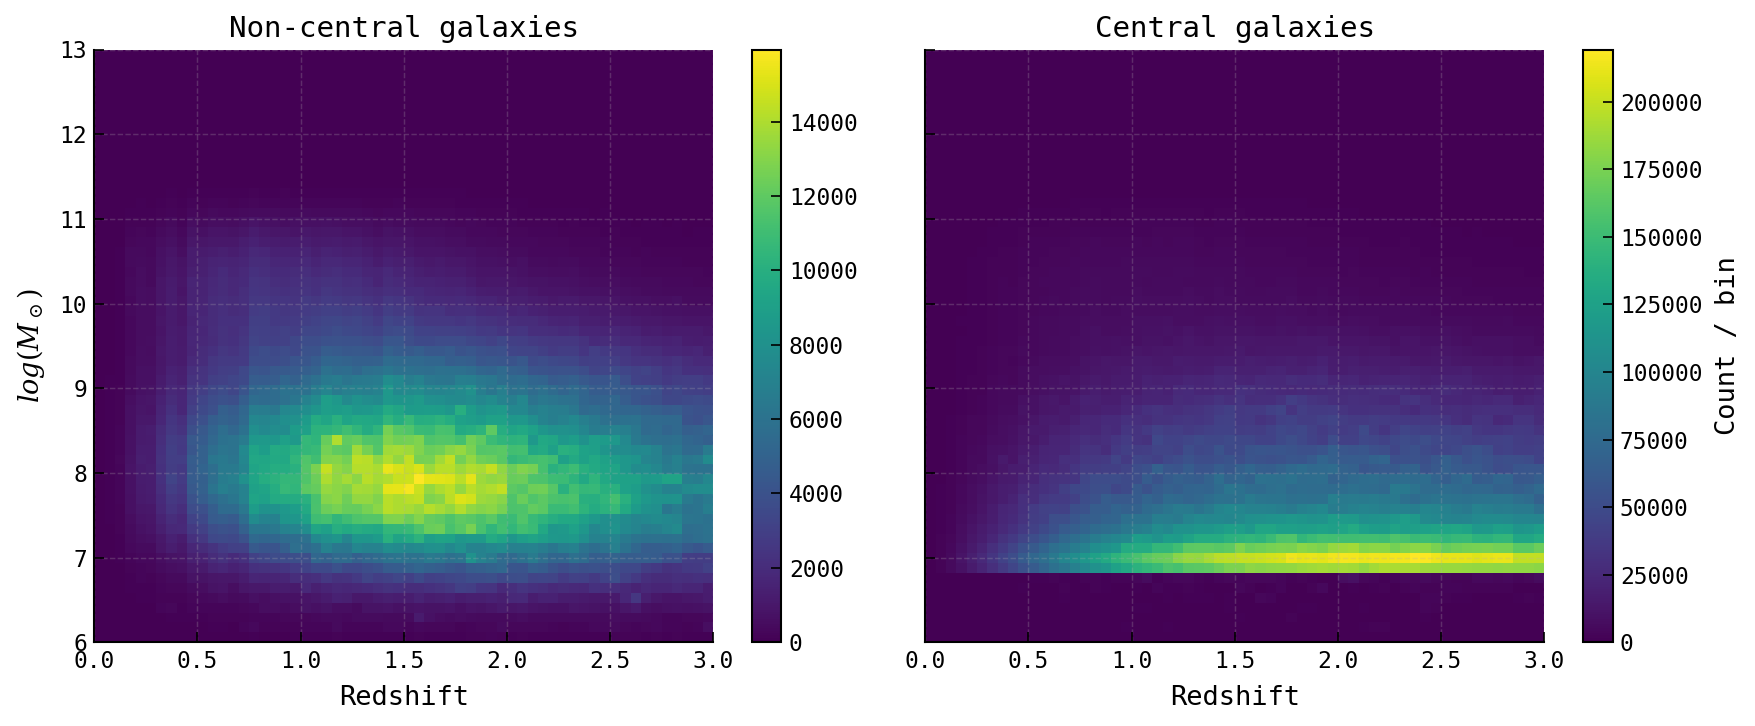

In [16]:
fig,axs = plt.subplots(1,2,figsize=(12,5),sharey=True)

for ax,mask,lbl in zip(axs.flatten(),[msk,~msk],["Non-central","Central"]):
    cc = ax.hist2d(data["redshift"][mask],np.log10(data["stellar_mass"][mask]),bins=[60,60],range=[[0,3],[6,13]])

    if ax==axs.flatten()[0]:
        fig.colorbar(cc[3], ax=ax)
    else:
        fig.colorbar(cc[3], ax=ax,label="Count / bin")
        
    ax.set_title(f"{lbl} galaxies")
    ax.set_xlabel("Redshift")
    
axs[0].set_ylabel("$log(M_\odot)$")
fig.tight_layout()

## Parent catalogs to generate
- Unaltered

In [17]:
myQuantitiesOfInterest = np.array(["ra","dec","redshift","redshiftHubble","galaxyID",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "totalMassStellar","stellar_mass","is_central"])

In [18]:
%%time
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest),))

CPU times: user 2.56 s, sys: 17.2 s, total: 19.8 s
Wall time: 29.4 s


## Weights to assign
- $L$
- $M_{star}$
- Uniform

In [19]:
del data

In [20]:
%%time 
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                   "LSST_filters/magnitude:LSST_u:rest",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                    "LSST_filters/magnitude:LSST_r:rest",
                                   "LSST_filters/magnitude:LSST_i:rest",
                                   "LSST_filters/magnitude:LSST_z:rest",
                                    "LSST_filters/magnitude:LSST_y:rest",
                                  "stellar_mass","halo_mass","is_central"])
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest)))
msk = data["is_central"]==False

CPU times: user 3.2 s, sys: 17.3 s, total: 20.5 s
Wall time: 23.9 s


In [21]:
for band in ["u","g","r","i","z","y"]:
    data["weight_L_{}".format(band)] = data["LSST_filters/magnitude:LSST_{}:rest".format(band)]/np.median(data["LSST_filters/magnitude:LSST_{}:rest".format(band)])
    data["weight_logL_{}".format(band)] = np.log10(data["LSST_filters/magnitude:LSST_{}:rest".format(band)]+30)/np.log10(np.median(data["LSST_filters/magnitude:LSST_{}:rest".format(band)]+30))
data["weight_M"] = data["stellar_mass"]/np.median(data["stellar_mass"])
data["weight_logM"] = np.log10(data["stellar_mass"])/np.log10(np.median(data["stellar_mass"]))

In [22]:
data

,LSST_filters/magnitude:LSST_u:rest,LSST_filters/magnitude:LSST_g:rest,redshiftHubble,LSST_filters/magnitude:LSST_y:rest,is_central,redshift,LSST_filters/magnitude:LSST_r:rest,LSST_filters/magnitude:LSST_i:rest,stellar_mass,halo_mass,...,weight_L_r,weight_logL_r,weight_L_i,weight_logL_i,weight_L_z,weight_logL_z,weight_L_y,weight_logL_y,weight_M,weight_logM
0,-18.130419,-19.170687,0.021528,-19.774324,True,0.022012,-19.490667,-19.641598,3.843968e+09,2.472611e+11,...,1.083579,0.946218,1.088646,0.942136,1.091608,0.939790,1.092925,0.938548,113.281881,1.272774
1,-14.983802,-15.799252,0.020944,-16.442663,True,0.020724,-16.130363,-16.299818,4.857164e+07,5.465768e+10,...,0.896764,1.057820,0.903426,1.054819,0.906953,1.053149,0.908785,1.052401,1.431408,1.020684
2,-18.356327,-19.306858,0.020528,-20.023260,True,0.020922,-19.664007,-19.851128,4.128166e+09,3.487682e+11,...,1.093216,0.939528,1.100259,0.933900,1.104730,0.930379,1.106684,0.928599,121.657211,1.276888
3,-15.005349,-16.075336,0.017873,-16.926462,True,0.018407,-16.518398,-16.736721,5.973682e+07,7.027417e+10,...,0.918336,1.046405,0.927642,1.041758,0.932968,1.038980,0.935524,1.037731,1.760446,1.032617
4,-16.253250,-17.022739,0.001106,-17.655111,True,0.000889,-17.320200,-17.488804,1.942851e+08,8.068516e+10,...,0.962912,1.021741,0.969326,1.018233,0.973671,1.015763,0.975797,1.014580,5.725590,1.100632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93947746,-17.562988,-18.458942,3.026532,-18.748577,True,3.028287,-18.602928,-18.674686,9.498182e+07,4.476727e+10,...,1.034225,0.978838,1.035054,0.978100,1.035667,0.977613,1.036233,0.977139,2.799118,1.059361
93947747,-18.306728,-19.071177,3.012949,-19.249542,True,3.012375,-19.150379,-19.191593,1.423304e+08,5.842828e+10,...,1.064661,0.959037,1.063704,0.959274,1.063617,0.959159,1.063921,0.958752,4.194481,1.082686
93947748,-17.951912,-18.618912,3.013216,-18.812241,True,3.012953,-18.704712,-18.753759,7.870476e+06,1.106196e+10,...,1.039884,0.975230,1.039437,0.975277,1.039620,0.975054,1.039751,0.974848,0.231943,0.915728
93947749,-16.476864,-17.100580,2.967263,-17.154819,True,2.965215,-17.130688,-17.144182,7.911783e+06,1.303879e+10,...,0.952376,1.027708,0.950225,1.029183,0.948756,1.030133,0.948146,1.030618,0.233161,0.916030


Text(0.5, 0, 'Luminosity weight in band')

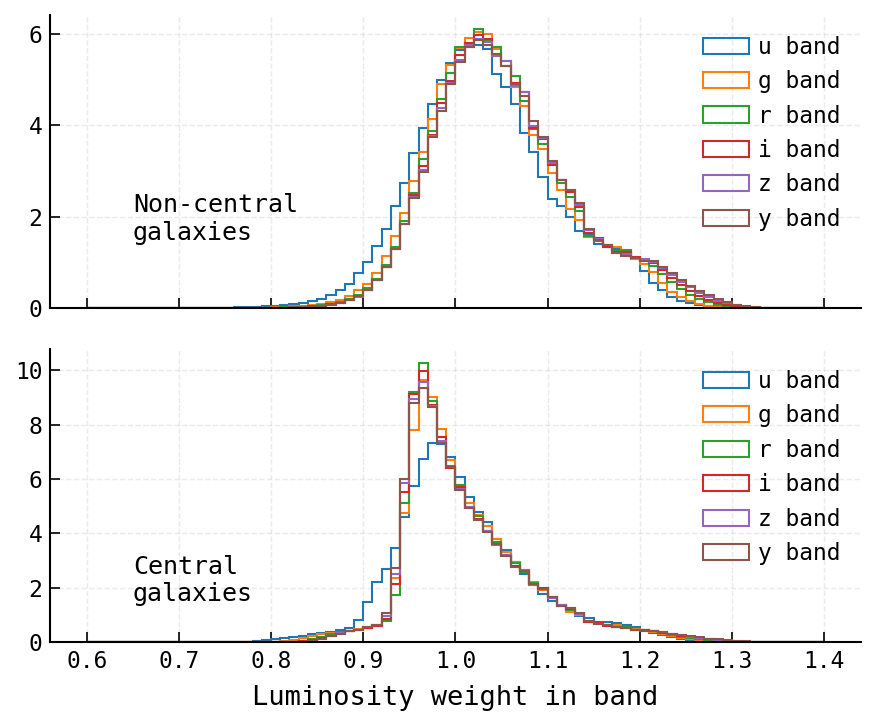

In [23]:
fig,axs = plt.subplots(2,1,figsize = (6,5),sharex=True)

for ax,mask,lbl in zip(axs.flatten(),[msk,~msk],["Non-central","Central"]):
    for band in ["u","g","r","i","z","y"]:
        ax.hist(data["weight_L_{}".format(band)][mask],label="{} band".format(band),histtype="step",bins=np.arange(0.6,1.41,step=0.01),density=True)
    ax.legend()
    ax.text(0.65,1.5,f"{lbl}\ngalaxies")
ax.set_xlabel("Luminosity weight in band")

Text(0.5, 0, 'Log-Luminosity weight in band')

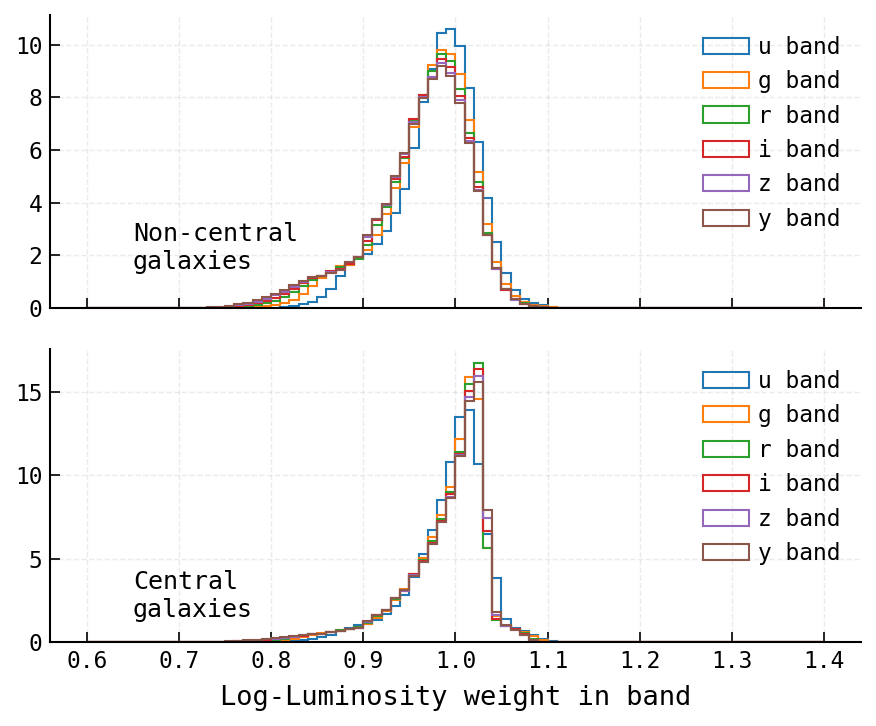

In [24]:
fig,axs = plt.subplots(2,1,figsize = (6,5),sharex=True)

for ax,mask,lbl in zip(axs.flatten(),[msk,~msk],["Non-central","Central"]):
    for band in ["u","g","r","i","z","y"]:
        ax.hist(data["weight_logL_{}".format(band)][mask],label="{} band".format(band),histtype="step",bins=np.arange(0.6,1.41,step=0.01),density=True)
    ax.legend()
    ax.text(0.65,1.5,f"{lbl}\ngalaxies")
ax.set_xlabel("Log-Luminosity weight in band")

Text(0.5, 0, 'Stellar mass weight in band')

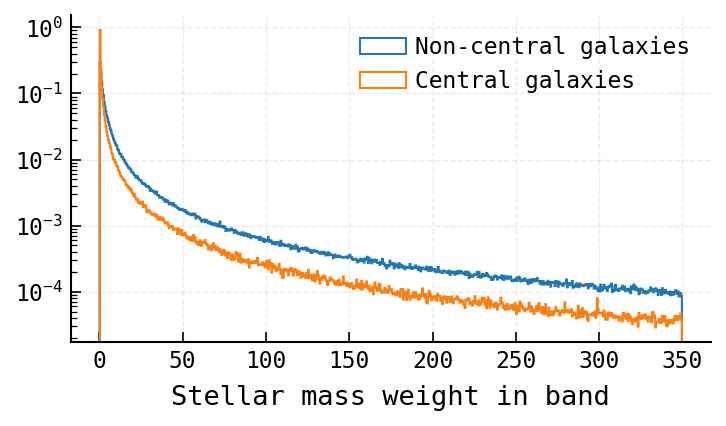

In [25]:
fig,ax = plt.subplots(figsize = (5,3))

for mask,lbl in zip([msk,~msk],["Non-central","Central"]):
    ax.hist(data["weight_M"][mask],label=f"{lbl} galaxies",histtype="step",bins=np.arange(0.2,350,step=0.5),density=True,log=True)
ax.legend()
ax.set_xlabel("Stellar mass weight in band")

In [26]:
del fig

# Recreate P(z) plots, this time separated by central/non-central

## draw 1M samples for each catalog

In [27]:
data.columns.values

array([np.str_('LSST_filters/magnitude:LSST_u:rest'),
       np.str_('LSST_filters/magnitude:LSST_g:rest'),
       np.str_('redshiftHubble'),
       np.str_('LSST_filters/magnitude:LSST_y:rest'),
       np.str_('is_central'), np.str_('redshift'),
       np.str_('LSST_filters/magnitude:LSST_r:rest'),
       np.str_('LSST_filters/magnitude:LSST_i:rest'),
       np.str_('stellar_mass'), np.str_('halo_mass'),
       np.str_('LSST_filters/magnitude:LSST_z:rest'), np.str_('galaxyID'),
       'weight_L_u', 'weight_logL_u', 'weight_L_g', 'weight_logL_g',
       'weight_L_r', 'weight_logL_r', 'weight_L_i', 'weight_logL_i',
       'weight_L_z', 'weight_logL_z', 'weight_L_y', 'weight_logL_y',
       'weight_M', 'weight_logM'], dtype=object)

#### The above histograms show that the only band that might have a different weight distribution. Therefore, I will drop all bands except u band, and one of g-r-i-z-y. I have chosen to keep r band here

In [43]:
for band in ["r","i","z","y"]:
    try:
        data.drop("LSST_filters/magnitude:LSST_{}:rest".format(band),inplace=True,axis=1)
        data.drop("weight_L_{}".format(band),inplace=True,axis=1)
        data.drop("weight_logL_{}".format(band),inplace=True,axis=1)
    except:
        continue

In [68]:
data.columns.values

array([np.str_('LSST_filters/magnitude:LSST_u:rest'),
       np.str_('LSST_filters/magnitude:LSST_g:rest'),
       np.str_('redshiftHubble'), np.str_('is_central'),
       np.str_('redshift'), np.str_('stellar_mass'), np.str_('halo_mass'),
       np.str_('galaxyID'), 'weight_L_u', 'weight_logL_u', 'weight_L_g',
       'weight_logL_g', 'weight_M', 'weight_logM'], dtype=object)

In [51]:
weights = ["weight_L","weight_logL","weight_M","weight_logM"]
# weights = ["weight_L","weight_M","weight_logM"]
remaining_bands = ["u","g"]
df_dict = {}

ERROR! Session/line number was not unique in database. History logging moved to new session 378


In [52]:
%%time 
# np.random.seed(1503170817)
n_merges = int(1E6) # Updated now to 1E7
# Getting indexes based on p_host
events_index_uniform = np.random.choice(data.index, 
                                size=n_merges, 
                                # p=phost.values
                                       )

df_dict["Uniform"]=data.iloc[events_index_uniform]

# Now we do the different weights

# Getting indexes based on p_host
for weight in weights:
    if (weight!="weight_L" and weight!="weight_logL"):
        events_index = np.random.choice(data.index, 
                                        size=n_merges, 
                                        p=data[weight]/np.sum(data[weight])
                                               )
        df_dict[weight] = data.iloc[events_index]
    else:
        for band in remaining_bands:
            newWeight=weight+"_"+band
            events_index = np.random.choice(data.index, 
                                            size=n_merges, 
                                            p=data[newWeight]/np.sum(data[newWeight])
                                                   )
            df_dict[newWeight] = data.iloc[events_index]

CPU times: user 17.7 s, sys: 12.6 s, total: 30.3 s
Wall time: 30.4 s


In [53]:
df_dict.keys()

dict_keys(['Uniform', 'weight_L_u', 'weight_L_g', 'weight_logL_u', 'weight_logL_g', 'weight_M', 'weight_logM'])

In [ ]:
del data

In [55]:
colors=[
    "#0085ad",
"#af272f",
"#4c8c2b",
"#eaaa00",
"#522506",
"#e9724d",
"#79ccb3"]

## P(z), before any SNR cut

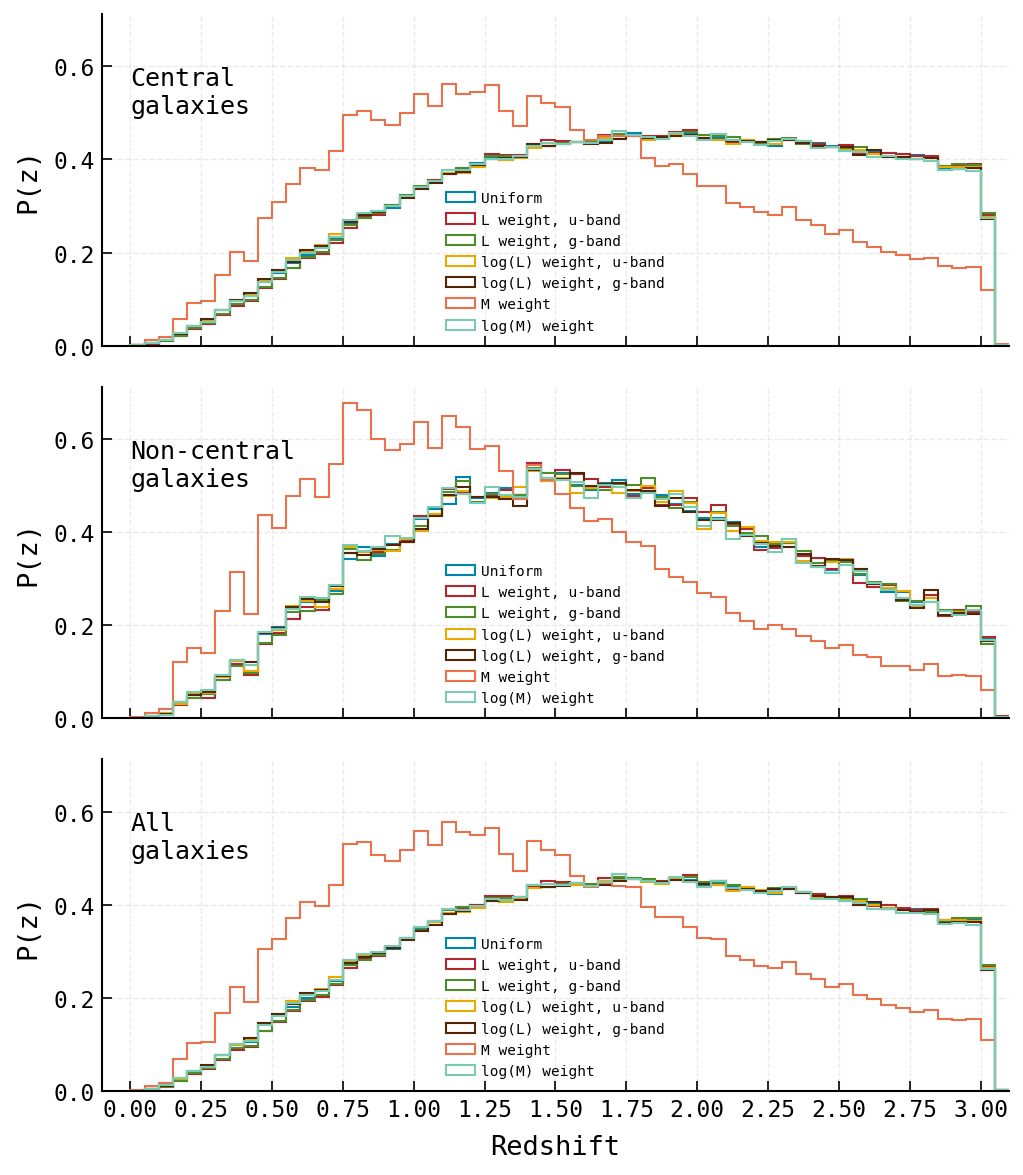

In [67]:
fig,axs = plt.subplots(3,1,figsize=[7,8],sharex=True,sharey=True)

for val,key,colr in zip(df_dict.values(),["Uniform","L weight, u-band","L weight, g-band","log(L) weight, u-band","log(L) weight, g-band","M weight","log(M) weight"],colors):
    mask = val["is_central"]==True # Mask all central galaxies
    axs[0].hist(val[mask]["redshift"],bins=np.arange(0,3.11,step=0.05), edgecolor=colr,label=key,histtype='step',density=True)
    axs[1].hist(val[~mask]["redshift"],bins=np.arange(0,3.11,step=0.05), edgecolor=colr,label=key,histtype='step',density=True)
    axs[2].hist(val["redshift"],bins=np.arange(0,3.11,step=0.05), edgecolor=colr,label=key,histtype='step',density=True)
for ax in axs:
    ax.grid(ls='--')
    ax.set_ylabel("P(z)")
    ax.set_xticks(np.arange(0,3.1,step=0.25))
    ax.legend(fontsize='xx-small')
    ax.set_xlim(-0.1,3.1)
axs[-1].set_xlabel("Redshift")
axs[0].text(0,0.5,"Central\ngalaxies")
axs[1].text(0,0.5,"Non-central\ngalaxies")
axs[2].text(0,0.5,"All\ngalaxies")
fig.tight_layout()

### Check that apparent magnitude reproduces previous z distribution

In [69]:
%%time 
myQuantitiesOfInterest = np.array(["redshift","redshiftHubble","galaxyID",
                                    "LSST_filters/magnitude:LSST_g:rest",
                                   "LSST_filters/magnitude:LSST_g:observed",
                                  "stellar_mass","halo_mass","is_central"])
data = pd.DataFrame(skysimCat.get_quantities(list(myQuantitiesOfInterest)))
msk = data["is_central"]==False

CPU times: user 2.39 s, sys: 12.1 s, total: 14.5 s
Wall time: 57.4 s


In [70]:
band="g"
data["weight_L_{}_rest".format(band)] = data["LSST_filters/magnitude:LSST_{}:rest".format(band)]/np.median(data["LSST_filters/magnitude:LSST_{}:rest".format(band)])
data["weight_L_{}_observed".format(band)] = data["LSST_filters/magnitude:LSST_{}:observed".format(band)]/np.median(data["LSST_filters/magnitude:LSST_{}:observed".format(band)])
data["weight_logL_{}_rest".format(band)] = np.log10(data["LSST_filters/magnitude:LSST_{}:rest".format(band)]+30)/np.log10(np.median(data["LSST_filters/magnitude:LSST_{}:rest".format(band)]+30))
data["weight_logL_{}_observed".format(band)] = np.log10(data["LSST_filters/magnitude:LSST_{}:observed".format(band)])/np.log10(np.median(data["LSST_filters/magnitude:LSST_{}:observed".format(band)]))
data["weight_M"] = data["stellar_mass"]/np.median(data["stellar_mass"])
data["weight_logM"] = np.log10(data["stellar_mass"])/np.log10(np.median(data["stellar_mass"]))

In [77]:
events_index = np.random.choice(data.index, 
                                size=n_merges, 
                                p=data["weight_L_g_observed"]/np.sum(data["weight_L_g_observed"])
                                       )
appMagWeighted = data.iloc[events_index]

Text(0.5, 0, 'Redshift')

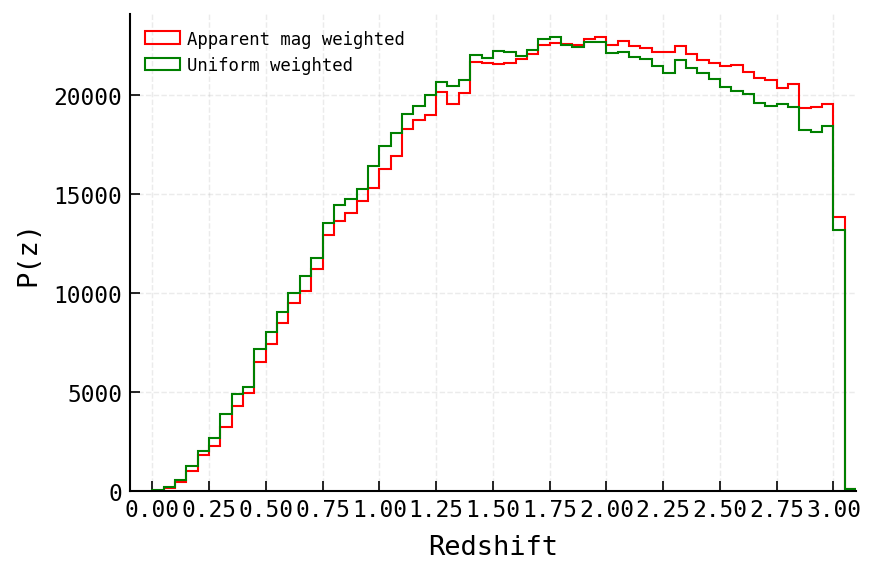

In [78]:
fig,ax = plt.subplots()

ax.hist(appMagWeighted["redshift"],bins=np.arange(0,3.11,step=0.05), edgecolor="red",label="Apparent mag weighted",histtype='step',density=False)
ax.hist(df_dict["Uniform"]["redshift"],bins=np.arange(0,3.11,step=0.05), edgecolor="green",label="Uniform weighted",histtype='step',density=False)
ax.grid(ls='--')
ax.set_ylabel("P(z)")
ax.set_xticks(np.arange(0,3.1,step=0.25))
ax.legend(fontsize='x-small')
ax.set_xlim(-0.1,3.1)
ax.set_xlabel("Redshift")

# Given the results above, create two CBC catalogs...
- Use the uniform parent catalog
- Draw 10M CBC's
- Weighted by stellar mass and uniform weights

In [82]:
del fig,data,df_dict

In [86]:
allQuantitiesOfInterest = ["ra","ra_true","dec","dec_true","redshift","redshiftHubble","galaxyID",
                        "stellar_mass","isCentral"]

In [87]:
%%time
data = pd.DataFrame(skysimCat.get_quantities(allQuantitiesOfInterest,))

CPU times: user 3.57 s, sys: 17.2 s, total: 20.8 s
Wall time: 1min 1s


In [88]:
data.index

RangeIndex(start=0, stop=93947751, step=1)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93947751 entries, 0 to 93947750
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   isCentral       bool   
 1   redshiftHubble  float64
 2   redshift        float64
 3   ra_true         float64
 4   dec             float64
 5   dec_true        float64
 6   stellar_mass    float32
 7   ra              float64
 8   galaxyID        int64  
dtypes: bool(1), float32(1), float64(6), int64(1)
memory usage: 5.3 GB


#### Set P_host

In [90]:
%%time 
data["weight_mass"] = data["stellar_mass"] / np.sum(data["stellar_mass"])

CPU times: user 387 ms, sys: 938 ms, total: 1.33 s
Wall time: 1.35 s


In [91]:
def stretch(ra_in,dec_in,ra_range=(60.46709862957921, 70.3338108507918),dec_range=(-46.57034567653332, -32.79850657784978)):
    delta_ra = ra_in - ra_range[0]
    delta_dec = dec_in - dec_range[0]

    stretched_ra = (1000*360 * (delta_ra / (ra_range[1]-ra_range[0])))%360
    stretched_dec = (1000*180 * (delta_dec / (dec_range[1]-dec_range[0])))%180 - 90

    return stretched_ra,stretched_dec

#### Creating a list of mergers

In [92]:
%%time 
# np.random.seed(1503170817)
n_merges = 10000000 # Updated now to 1E7

# Uniform weights
events_index_uniform = np.random.choice(data.index, 
                                size=n_merges, 
                                )

# Getting indexes based on mass weight
events_index_massWeight = np.random.choice(data.index, 
                                size=n_merges, 
                                p=data["weight_mass"])

CPU times: user 15.5 s, sys: 1.04 s, total: 16.6 s
Wall time: 16.7 s


In [93]:
events_index.shape
cat_cbc_uniform = data.iloc[events_index_uniform]
cat_cbc_massWeight = data.iloc[events_index_massWeight]

In [94]:
data.shape, cat_cbc_uniform.shape, cat_cbc_massWeight.shape

((93947751, 10), (10000000, 10), (10000000, 10))

In [33]:
cat_cbc

,ra,hostHaloMass,LSST_filters/magnitude:LSST_r:rest,galaxyID,totalMassStellar,ra_true,dec,redshiftHubble,baseDC2/sod_halo_radius,dec_true,hostHaloTag,isCentral,baseDC2/sfr,redshift
53824092,62.770779,2.550164e+12,-23.153709,10070200392465,1.111759e+11,62.770779,-40.208431,2.787557,0.350757,-40.208431,1028917196889,False,0.0,2.786418
81850721,62.394007,2.485489e+12,-22.049614,9814202166423,6.352384e+09,62.394007,-37.236766,2.044943,0.351237,-37.236766,500460665777,True,0.0,2.044516
20694499,67.617224,6.541729e+11,-22.024382,10072100184865,2.136870e+10,67.617224,-41.572680,1.834209,-1.000000,-41.572680,363309433045,True,0.0,1.834906
46311563,66.938860,4.065490e+10,-18.967964,9816101164643,1.435176e+08,66.938860,-36.626004,1.442409,-1.000000,-36.626004,346198709793,True,0.0,1.437018
52563526,61.436562,1.303860e+13,-21.558790,10070201792402,1.670560e+10,61.436562,-41.042127,2.190634,0.583786,-41.042127,509173840589,False,0.0,2.179471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78052987,62.544190,3.548066e+11,-21.989815,9686201071622,1.892635e+10,62.544190,-35.369961,2.492613,-1.000000,-35.369961,872260833462,True,0.0,2.486440
45640458,67.224608,1.768492e+12,-21.784256,9816101815157,1.982772e+10,67.224608,-37.116259,1.173380,-1.000000,-37.116259,701421307235,False,0.0,1.161973
16577413,61.655855,5.137304e+11,-21.039886,10070100052626,5.367000e+09,61.655855,-40.896745,1.902584,-1.000000,-40.896745,466804426831,True,0.0,1.899893
82229124,60.824988,2.088185e+11,-20.336859,9814201794489,5.684805e+08,60.824988,-37.371238,2.171678,-1.000000,-37.371238,542825983045,True,0.0,2.164332


In [95]:
cat_cbc_uniform.galaxyID.value_counts()

galaxyID
10199000388318    5
10072201061949    5
9559000794431     5
9816000624512     5
10327000813017    5
                 ..
10071000552222    1
9559000281674     1
10199202342110    1
10198100994073    1
10326202441042    1
Name: count, Length: 9486609, dtype: int64

In [96]:
cat_cbc_massWeight.galaxyID.value_counts()

galaxyID
9559101104003     317
9942000005543     247
10326101067732    196
10070000424256    187
9816101963299     182
                 ... 
10198000686151      1
10327101535957      1
10071200034460      1
10070200215750      1
9814000133944       1
Name: count, Length: 3979996, dtype: int64

In [97]:
%%time 

catmock_uniform = cat_cbc_uniform.apply(lambda x: stretch(x['ra'], x['dec']), result_type='expand', axis=1)
catmock_uniform = catmock_uniform.rename(columns={0:'mra', 1: 'mdec'}, )

catmock_massWeight = cat_cbc_massWeight.apply(lambda x: stretch(x['ra'], x['dec']), result_type='expand', axis=1)
catmock_massWeight = catmock_massWeight.rename(columns={0:'mra', 1: 'mdec'}, )

CPU times: user 4min 44s, sys: 21.7 s, total: 5min 6s
Wall time: 5min 22s


In [98]:
catmock_uniform

,mra,mdec
64638589,314.950960,29.147502
78784302,284.105302,-43.856175
90187979,22.165770,50.487626
81862406,294.838615,-17.819013
69019253,26.755299,-71.468068
...,...,...
35798948,31.348609,-49.181845
45389129,212.482444,83.196599
92070048,321.750005,10.953697
65711423,76.438012,50.686590


In [99]:
catmock_massWeight

,mra,mdec
39297608,72.998015,38.143613
18712706,12.480574,36.200260
39146382,102.878434,-43.569698
51440850,115.064002,-47.438192
46937402,103.482553,-75.799462
...,...,...
6046575,239.982722,-74.348972
25911459,345.688513,-76.830838
13005797,192.909696,-61.737997
23714748,250.729016,-36.924615


In [100]:
cat_cbc_uniform[["mra","mdec"]] = catmock_uniform[['mra', 'mdec']]
cat_cbc_massWeight[["mra","mdec"]] = catmock_massWeight[['mra', 'mdec']]

/tmp/ipykernel_2101321/3793884290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cbc_uniform[["mra","mdec"]] = catmock_uniform[['mra', 'mdec']]
/tmp/ipykernel_2101321/3793884290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cbc_uniform[["mra","mdec"]] = catmock_uniform[['mra', 'mdec']]
/tmp/ipykernel_2101321/3793884290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [101]:
cat_cbc_uniform

,isCentral,redshiftHubble,redshift,ra_true,dec,dec_true,stellar_mass,ra,galaxyID,weight_mass,mra,mdec
64638589,True,2.079072,2.081426,68.625635,-42.484765,-42.484765,11902430.0,68.625635,10200202292272,9.725325e-11,314.950960,29.147502
78784302,True,2.845811,2.845715,63.178364,-36.169077,-36.169077,9669888.0,63.178364,9686200612048,7.901143e-11,284.105302,-43.856175
90187979,False,2.422664,2.419103,62.746917,-38.461756,-38.461756,191487232.0,62.746917,9942201188065,1.564618e-09,22.165770,50.487626
81862406,True,2.058267,2.064632,61.560518,-37.158657,-37.158657,11722613.0,61.560518,9814202178108,9.578399e-11,294.838615,-17.819013
69019253,True,2.852041,2.852421,65.943857,-44.062453,-44.062453,21916354.0,65.943857,10326200309606,1.790758e-10,26.755299,-71.468068
...,...,...,...,...,...,...,...,...,...,...,...,...
35798948,True,1.655640,1.662018,64.197575,-35.122824,-35.122824,64159736.0,64.197575,9559100778629,5.242411e-10,31.348609,-49.181845
45389129,True,1.014685,1.015600,67.458555,-36.214443,-36.214443,9385718.0,67.458555,9816102206298,7.668952e-11,212.482444,83.196599
92070048,True,2.125676,2.124483,66.317011,-38.781533,-38.781533,13393792.0,66.317011,9943202053654,1.094390e-10,321.750005,10.953697
65711423,True,2.575679,2.574958,67.869228,-42.083734,-42.083734,15341924.0,67.869228,10200201081726,1.253569e-10,76.438012,50.686590


In [102]:
cat_cbc_massWeight

,isCentral,redshiftHubble,redshift,ra_true,dec,dec_true,stellar_mass,ra,galaxyID,weight_mass,mra,mdec
39297608,True,1.262711,1.262725,66.468060,-34.992197,-34.992197,1.350551e+11,66.468060,9687101595361,1.103518e-06,72.998015,38.143613
18712706,False,1.927220,1.926733,64.404259,-41.230988,-41.230988,1.324892e+11,64.404259,10071100009772,1.082552e-06,12.480574,36.200260
39146382,True,1.224648,1.227483,65.896610,-36.651069,-36.651069,1.623838e+08,65.896610,9687101695632,1.326818e-09,102.878434,-43.569698
51440850,True,1.779333,1.786304,65.847610,-39.460820,-39.460820,6.960762e+10,65.847610,9943100368276,5.687551e-07,115.064002,-47.438192
46937402,False,1.687528,1.680329,66.794497,-36.598448,-36.598448,7.457669e+09,66.794497,9816100579750,6.093567e-08,103.482553,-75.799462
...,...,...,...,...,...,...,...,...,...,...,...,...
6046575,False,0.454305,0.455519,67.321174,-43.635746,-43.635746,3.321826e+10,67.321174,10327000110382,2.714222e-07,239.982722,-74.348972
25911459,True,1.215270,1.216484,69.011279,-41.611476,-41.611476,3.741065e+11,69.011279,10200101704248,3.056777e-06,345.688513,-76.830838
13005797,True,0.554839,0.552378,62.968664,-37.575172,-37.575172,1.280354e+11,62.968664,9942000201571,1.046161e-06,192.909696,-61.737997
23714748,True,1.238694,1.235590,66.216397,-42.944291,-42.944291,8.365162e+09,66.216397,10199101748653,6.835069e-08,250.729016,-36.924615


In [103]:
%%time 
ofn = "../data/mockCBCCatalog_csvs/UniformParent,UniformWeight.csv"
assert not os.path.isfile(ofn), "File exists!!!"
cat_cbc_uniform[["galaxyID", 'redshiftHubble', 'ra', 'dec', 'mra', 'mdec' ]].to_csv(ofn)

CPU times: user 1min 2s, sys: 1.68 s, total: 1min 3s
Wall time: 1min 5s


In [104]:
!ls -lh {ofn}

-rw-r--r-- 1 seanmacb seanmacb 1.1G Oct  7 13:30 ../data/mockCBCCatalog_csvs/UniformParent,UniformWeight.csv


In [105]:
%%time 
ofn = "../data/mockCBCCatalog_csvs/UniformParent,StellarMassWeight.csv"
assert not os.path.isfile(ofn), "File exists!!!"
cat_cbc_massWeight[["galaxyID", 'redshiftHubble', 'ra', 'dec', 'mra', 'mdec' ]].to_csv(ofn)

CPU times: user 1min 2s, sys: 1.9 s, total: 1min 4s
Wall time: 1min 6s


In [106]:
!ls -lh {ofn}

-rw-r--r-- 1 seanmacb seanmacb 1.1G Oct  7 13:31 ../data/mockCBCCatalog_csvs/UniformParent,StellarMassWeight.csv


Text(0.5, 1.0, "Distribution of CBC's across\nthe sky for uniform weighted catalog")

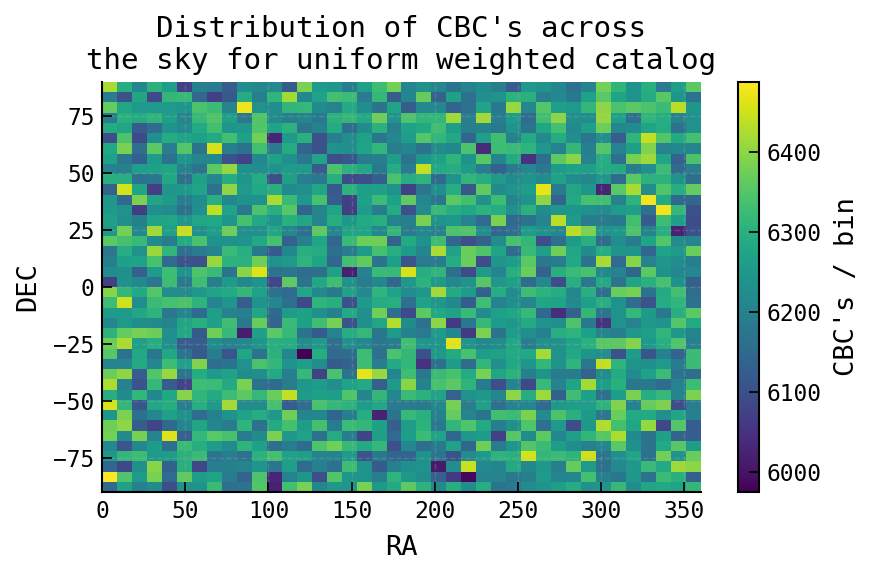

In [122]:
# Check distribution for mock_ra and mock_dec
h,yedges,xedges,img = plt.hist2d(x=cat_cbc_uniform['mra'], y=cat_cbc_uniform['mdec'], bins=40,); 
plt.xlim(0, 360)
plt.ylim(-90, 90)
cax = plt.colorbar(label="CBC's / bin")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Distribution of CBC's across\nthe sky for uniform weighted catalog")

Text(0.5, 1.0, "Distribution of CBC's across\nthe sky for stellar mass weighted catalog")

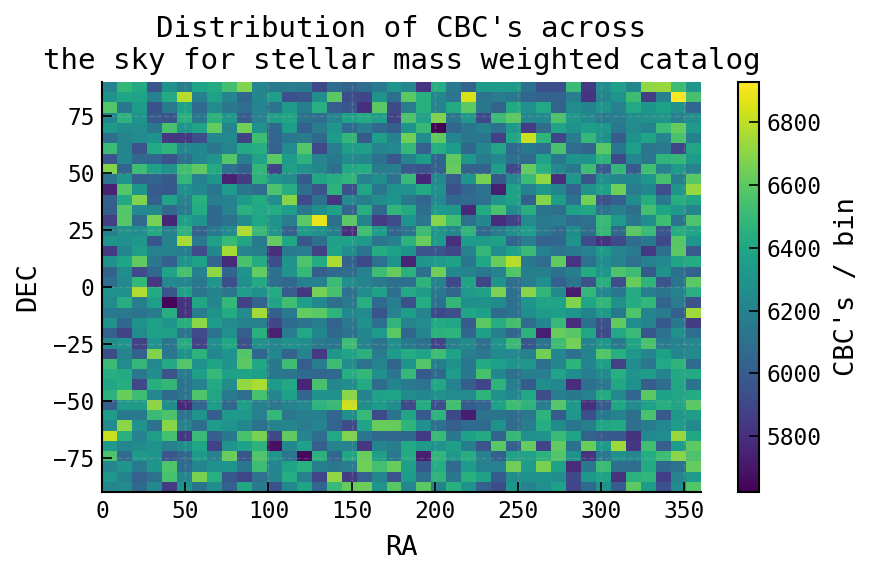

In [123]:
# Check distribution for mock_ra and mock_dec
h,yedges,xedges,img = plt.hist2d(x=cat_cbc_massWeight['mra'], y=cat_cbc_massWeight['mdec'], bins=40,); 
plt.xlim(0, 360)
plt.ylim(-90, 90)
cax = plt.colorbar(label="CBC's / bin")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Distribution of CBC's across\nthe sky for stellar mass weighted catalog")

Text(0.5, 1.0, 'Uniform weighted catalog')

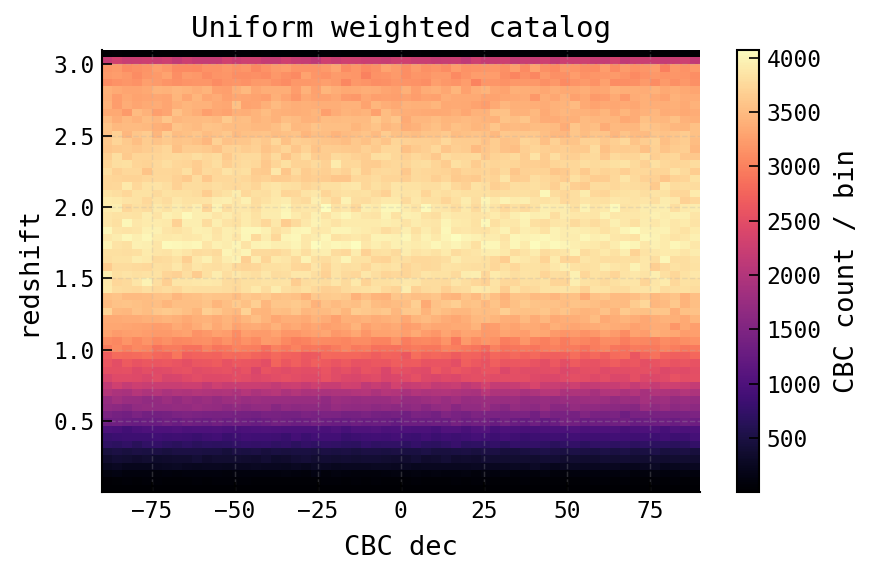

In [125]:
plt.hist2d(cat_cbc_uniform['mdec'], cat_cbc_uniform['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC dec")
plt.ylabel("redshift")
plt.title("Uniform weighted catalog")

Text(0.5, 1.0, 'Uniform weighted catalog')

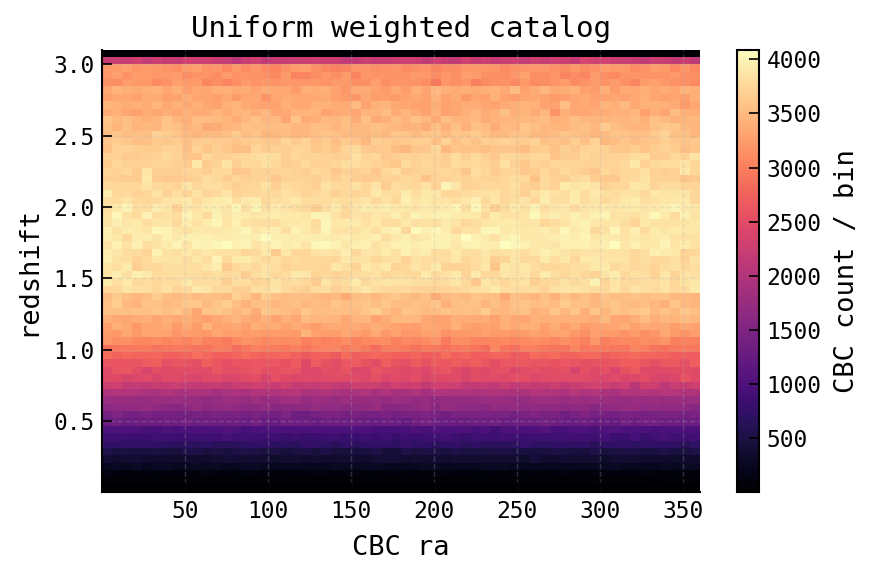

In [126]:
plt.hist2d(cat_cbc_uniform['mra'], cat_cbc_uniform['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC ra")
plt.ylabel("redshift")
plt.title("Uniform weighted catalog")


Text(0.5, 1.0, 'Stellar-mass weighted catalog')

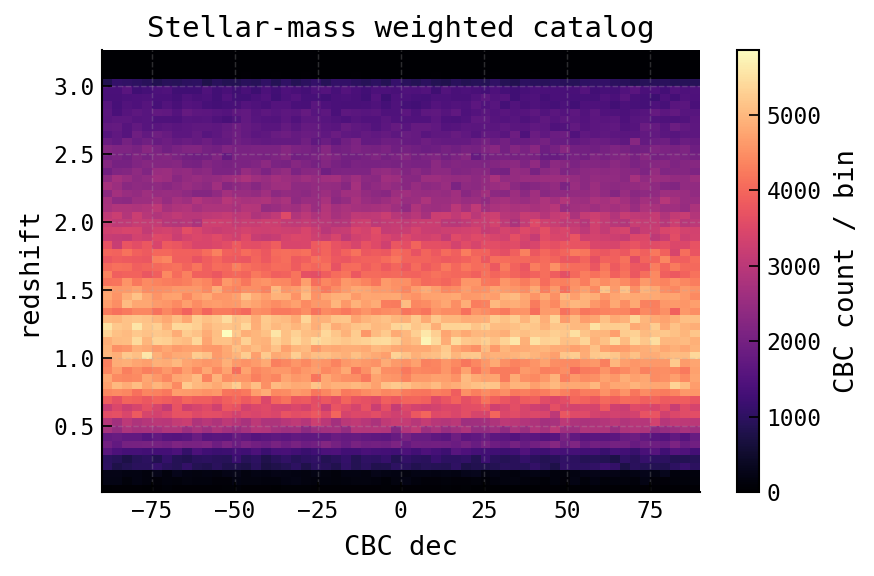

In [127]:
plt.hist2d(cat_cbc_massWeight['mdec'], cat_cbc_massWeight['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC dec")
plt.ylabel("redshift")
plt.title("Stellar-mass weighted catalog")

Text(0.5, 1.0, 'Stellar-mass weighted catalog')

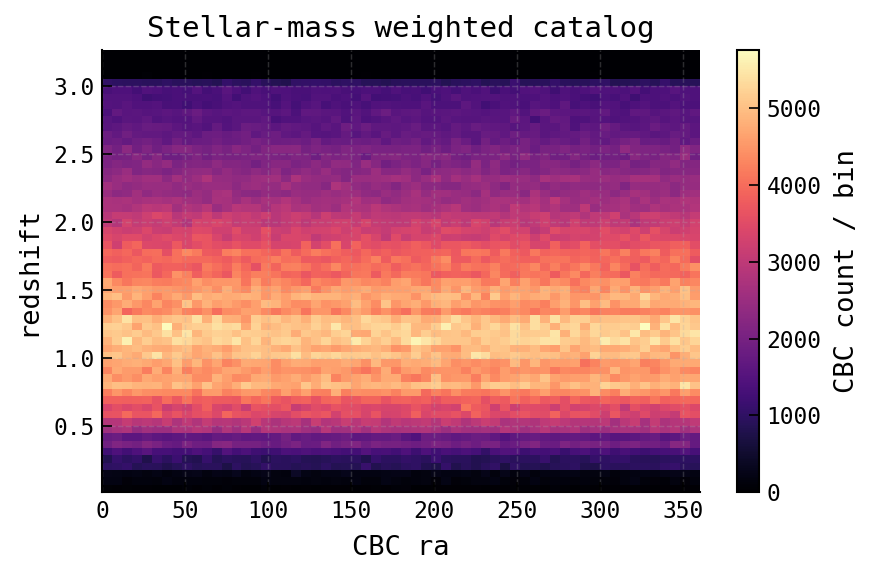

In [128]:
plt.hist2d(cat_cbc_massWeight['mra'], cat_cbc_massWeight['redshift'], bins=60, cmap='magma'); plt.colorbar(label="CBC count / bin")
plt.xlabel("CBC ra")
plt.ylabel("redshift")
plt.title("Stellar-mass weighted catalog")

In [117]:
import healpy as hp
NSIDE=32

def radecToIndex(RA, DEC, NSIDE=NSIDE):
    return hp.pixelfunc.ang2pix(NSIDE,np.radians(-DEC+90.),np.radians(360.-RA))

In [129]:
%%time
hpindex = cat_cbc_uniform.apply(lambda x: radecToIndex(x["mra"], x["mdec"]), result_type='expand', axis=1)
thpindex = cat_cbc_uniform.apply(lambda x: radecToIndex(x["ra"], x["dec"]), result_type='expand', axis=1)

m16=np.zeros(hp.nside2npix(NSIDE))
t16=np.zeros(hp.nside2npix(NSIDE))
m16[pixcounts.index] = pixcounts 
t16[tpixcounts.index] = tpixcounts 

hp.mollview(m16, min=40, max=150, cmap='magma')
plt.show()
plt.figure(figsize=(8,4))
hp.mollview(t16, cmap='magma', title='original')

In [ ]:
%%time
hpindex = cat_cbc_massWeight.apply(lambda x: radecToIndex(x["mra"], x["mdec"]), result_type='expand', axis=1)
thpindex = cat_cbc_massWeight.apply(lambda x: radecToIndex(x["ra"], x["dec"]), result_type='expand', axis=1)

m16=np.zeros(hp.nside2npix(NSIDE))
t16=np.zeros(hp.nside2npix(NSIDE))
m16[pixcounts.index] = pixcounts 
t16[tpixcounts.index] = tpixcounts 

hp.mollview(m16, min=40, max=150, cmap='magma')
plt.show()
plt.figure(figsize=(8,4))
hp.mollview(t16, cmap='magma', title='original')